In [433]:
# =============================================================================================

#  COMPREHENSIVE LIBRARY IMPORTS FOR HEART DISEASE ANALYSIS

# ========================================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder ,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve)

print("\n\n ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============\n\n")



 ============= ALL LIBRARIES IMPORTED SUCCESSFULLY!==============




# 1. LOADING AND INSPECTING HEART FAILURE DATASET

In [390]:
# Loading the dataset
data = pd.read_csv('mergecvd.csv')

print("\n Dataset Loaded Successfully!")
print(f'\n Dataset Shape : {data.shape[0]} rows * {data.shape[1]} columns ')

print("\n FIRST 10 ROWS OF THE DATASET")
data.head(10)



 Dataset Loaded Successfully!

 Dataset Shape : 1918 rows * 12 columns 

 FIRST 10 ROWS OF THE DATASET


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [391]:
print("\nDATASET INFORMATION\n")
data.info()


DATASET INFORMATION

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1918 entries, 0 to 1917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             1918 non-null   int64  
 1   Sex             1918 non-null   object 
 2   ChestPainType   1918 non-null   object 
 3   RestingBP       1918 non-null   int64  
 4   Cholesterol     1918 non-null   int64  
 5   FastingBS       1918 non-null   int64  
 6   RestingECG      1918 non-null   object 
 7   MaxHR           1918 non-null   int64  
 8   ExerciseAngina  1918 non-null   object 
 9   Oldpeak         1918 non-null   float64
 10  ST_Slope        1738 non-null   object 
 11  HeartDisease    1918 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 179.9+ KB


In [392]:
print("\nSTATISTICAL SUMMARY\n")
data.describe()



STATISTICAL SUMMARY



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000,1918.000000
mean,51.285193,142.485401,257.531283,0.265902,141.328467,1.836444,0.567258
std,14.609167,26.932915,134.286677,0.441928,30.627152,1.707201,0.495585
min,20.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,41.000000,124.000000,197.250000,0.000000,120.000000,0.300000,0.000000
50%,53.000000,138.000000,256.000000,0.000000,141.000000,1.500000,1.000000
75%,62.000000,160.000000,337.000000,1.000000,165.000000,2.900000,1.000000
max,80.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## Insights
### Age
- The median average age group of people are nearly 51. it means population centered arounf 50 years old , with moderate spread.
- Majority of cases belong to middle and older age groups ,it means consistent with heart disease risk factors.
### RestingBp
- The average RestingBP of the people are 142 , Slightly elevated average BP(normal is 120 mmHg).
- 75 percent of population are suffering from high RestingBP i.e. 160 mm/Hg.
- Dataset mainly represents hypertensive individuals, which alighns with heart disease correlation.
## Cholestrol
- average = 257.5 -> After analysis we can say that average cholesterol slightly above normal (<200 mg/dL).
## Fasting BS
- most of the people having not suffereing from FastingBS . around 26% of patients have high blood sugar.
- May be quarter of patients may be diabetic another risk factor of heart disease.

## MaxHR(Maximum Heart Rate Achieved)
- Aprroximately normal distributions ; no outliers .

## Oldpeak (ST depression Induced by Exercise)
- 75 percent of population have mild-to-moderate ST depression.
## HeartDisease(Target Variable)
- Dataset is balanced.

In [393]:
print("\n=============================================================================\n")
print("DATASET COLUMN NAMES")
print("\n=============================================================================\n")

print(data.columns)



DATASET COLUMN NAMES


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


In [394]:
print("\n================================================================================")
print("\nDATA QUALITY ASSESSMENT")
print("\n================================================================================")




DATA QUALITY ASSESSMENT




 TARGET VARIABLE DISTRIBUTION

HeartDisease
1    1088
0     830
Name: count, dtype: int64




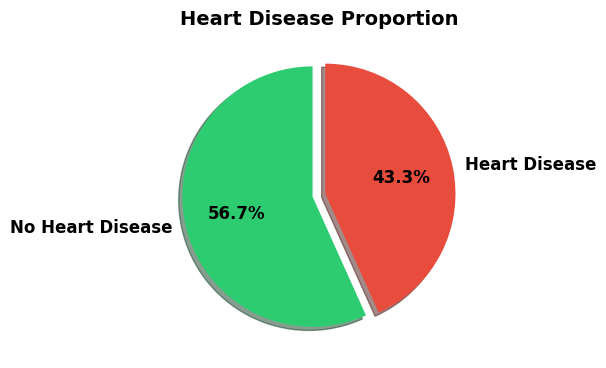


 DATASET IS BALANCED



In [425]:
# Checking the balanced or imbalanced dataset
print("=================================================================================")
print("\n TARGET VARIABLE DISTRIBUTION")
print("\n==================================================================================")

print(data['HeartDisease'].value_counts())
print('\n')
# Set up color theme
colors_pie = ['#2ECC71', '#E74C3C']  # Green = No Disease, Red = Disease

# Create figure and axes
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

# Plot pie chart
axes.pie(
    data['HeartDisease'].value_counts(),
    labels=['No Heart Disease', 'Heart Disease'],
    autopct='%1.1f%%',
    colors=colors_pie,
    startangle=90,
    explode=(0.05, 0.05),
    shadow=True,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)

# Title
axes.set_title('Heart Disease Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


print("\n DATASET IS BALANCED\n")

In [396]:
data['Sex'].value_counts()

Sex
M    1490
F     428
Name: count, dtype: int64

In [397]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    540
NAP    515
TA     466
ATA    397
Name: count, dtype: int64

In [398]:
data['FastingBS'].value_counts()

FastingBS
0    1408
1     510
Name: count, dtype: int64

In [399]:
data['RestingECG'].value_counts()

RestingECG
Normal    1006
ST         522
LVH        390
Name: count, dtype: int64

In [400]:
data['ExerciseAngina'].value_counts()

ExerciseAngina
N    1049
Y     869
Name: count, dtype: int64

In [401]:
data['ST_Slope'].value_counts()

ST_Slope
Flat    782
Up      694
Down    262
Name: count, dtype: int64

# 2. Data Cleaning     

In [402]:
# checking the missing values in the dataset
print("=================================================================================")
print("\n  MISSING VALUES ANALYSIS")
print("\n==================================================================================")

print(data.isna().sum())

print("\n ST_Slope column have missing values detected!\n")


  MISSING VALUES ANALYSIS

Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope          180
HeartDisease        0
dtype: int64

 ST_Slope column have missing values detected!



In [403]:
# Checking Duplicate
print("=================================================================================")
print("\n  DUPLICATE ROWS ANALYSIS")
print("\n==================================================================================")

data.duplicated().sum()


  DUPLICATE ROWS ANALYSIS



np.int64(0)

- No duplicate rows found!

In [404]:
X = data.drop('HeartDisease',axis=1)
y = data['HeartDisease']

print(f'\nShape of X {X.shape} , Shape of y {y.shape}\n')


Shape of X (1918, 11) , Shape of y (1918,)



In [405]:
#Numerical Columns
num_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
#Categorical Columns
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
print(f'\n   Numerical Columns:\n {num_cols}')
print(f'\n   Categorical Columns:\n {cat_cols}')


   Numerical Columns:
 ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

   Categorical Columns:
 ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']



DISTRIBUTION OF EACH FEATURES VARIABLES BEFORE TREATING OUTLIER



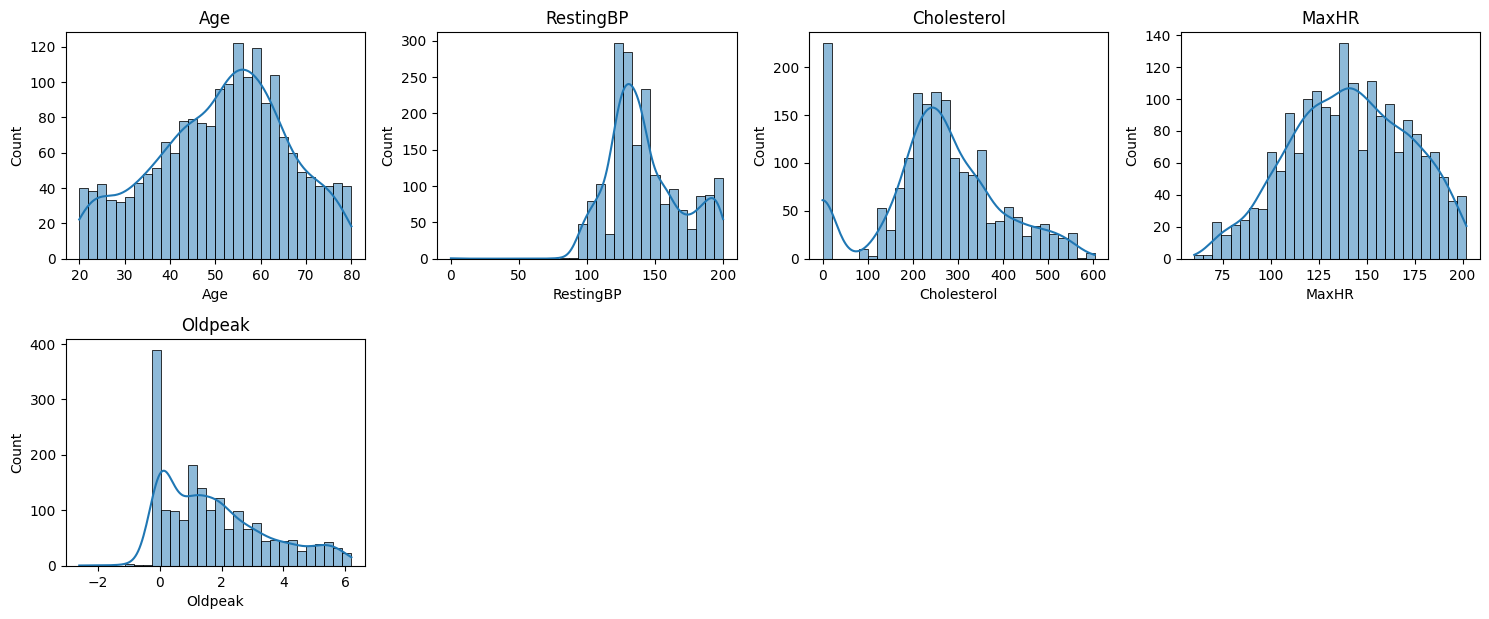

In [406]:
print("\nDISTRIBUTION OF EACH FEATURES VARIABLES BEFORE TREATING OUTLIER\n")
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

We plot the Histogram for the numerical feature to see the distribution of each features in the datasets before identifying the outlier.

Text(0.5, 1.0, 'Boxplot ')

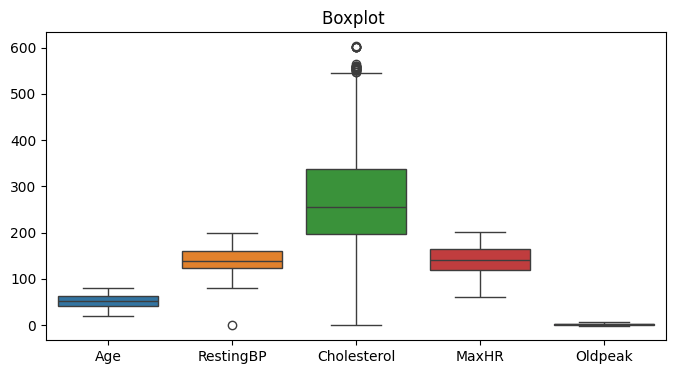

In [407]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(8,4))
sns.boxplot(data=X[num_cols])
plt.title('Boxplot ')

## Identifying and Treating the Outliers



**Medical / Domain Rationale for Defining Outliers**

From the above boxplot we can clearly see the outlier in the Cholesterol and resting BP features variables . There are only one outlier in resting BP but many are in Cholesterol.
Applying the domain Knowldege before treating outlier :- 
1. Cholesterol
Cholesterol column typically refers to serum cholesterol in mg/dL (milligrams per deciliter).
Cholesterol = 0 →  Impossible (no living person can have 0 mg/dL cholesterol).
→ Invalid or irrelevant

Cholesterol < 100 →  Unrealistically low in most adults; likely incorrect or device error.
We can considered it has as a outlier

Cholesterol > 400–500 →  Extremely rare; could happen in severe familial hypercholesterolemia, but generally not in population data.
we will treat as a outlier

- Age is fine minimum is 28 and maximum is 77
- RestingBP < 40 Resting BP > 250 are considered as a outlier.
- Cholesterol < 100 or Cholesterol > 400 → we treat as outlier
- Fasting BS are binary 0 and 1
- Max HR are fine betwen 60 - 202
- Oldpeak < 0 or Oldpeak > 6 → Outlier/Invalid

In [408]:
# Counting the outlier as per the Domain Knowledge 

print("\n==============================================================================")
print("\n COUNTING THE OUTLIER AS PER THE DOMAIN KNOWLEDGE\n")
print("\n================================================================================\n")
# Resting BP outlier
outlier_restingBP = X[(X['RestingBP'] < 40) | (X['RestingBP'] > 250)]
# Cholestrol outliers
outlier_chol = X[(X['Cholesterol'] < 100 ) | (X['Cholesterol'] > 400) ]
# Oldpeak outlier
outlier_oldpeak = X[(X['Oldpeak'] < 0 ) | (X['Oldpeak'] > 6 )]

# Count total outlier
print("RestingBP outliers:",len(outlier_restingBP))
print("Cholesterol outliers:",len(outlier_chol))
print("Oldpeak outliers:",len(outlier_oldpeak))
print('\n')



 COUNTING THE OUTLIER AS PER THE DOMAIN KNOWLEDGE



RestingBP outliers: 1
Cholesterol outliers: 507
Oldpeak outliers: 27




- As per the Domain Knowledge we found the outlier in the column RestingBP , Cholesterol , Oldpeak.
- The large number of outliers in Cholesterol suggests measurement errors or data entry issues rather than genuine extremes.

**Outlier** 

Rather than deleting the outlier rows which cause loss of valuable data in a small dataset , we treated them as missing or invalid values and replaced them based on the skewness of data distribution.

In [416]:
# Treating the Domain Knowledge  Outlier
X['Oldpeak'] = np.where((X['Oldpeak'] < 0) | (X['Oldpeak'] > 6) ,
                       X['Oldpeak'].median(),
                       X['Oldpeak'])
X['RestingBP'] = np.where((X['RestingBP'] < 40) | (X['RestingBP'] > 250),
                         X['RestingBP'].median(),
                         X['RestingBP'])
X['Cholesterol'] = np.where(X['Cholesterol'] < 100 ,
                           X['Cholesterol'].median(),
                           np.where(X['Cholesterol'] > 400 , 400 , X['Cholesterol']))
# X.describe()
print('\n')

We choose median imputation because it provides a robust central tendency for right skewed medical features , prevent bias from extreme cases , and maintains realistic physiological representation of the data.

In [412]:
# plt.figure(figsize=(15,12))
# for i ,col in enumerate(X[num_cols].columns):
#     plt.subplot(4,4,i+1)
#     sns.histplot(X[col],bins=30,kde=True)
#     plt.title(col)
# plt.tight_layout()
# plt.show()


 BOXPLOT AFTER TREATING OUTLIER



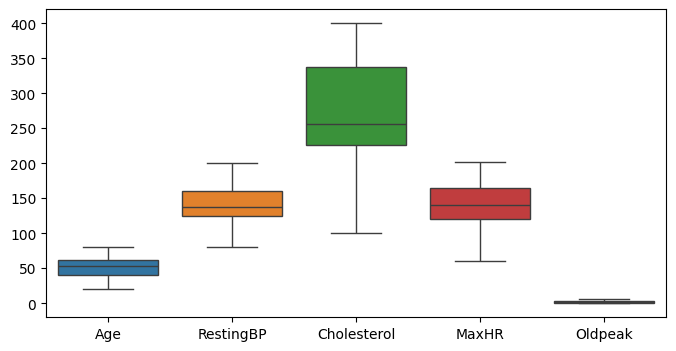

In [418]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(8,4))
sns.boxplot(data=X[num_cols])
# plt.title('Boxplot ')
print('\n BOXPLOT AFTER TREATING OUTLIER\n')

As the above boxplot shows the absence of outliers in each features. Now our dataset become outlier free .

In [364]:
# # Statsitical Method for outlier detection and treating using IQR 
# # Counting the number of columns
# numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# for col in numerical_cols :
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
#     print(f'Number of Outlier in feature {col} is : {outliers.count()}.')

#     # Handling the Outlier by IQR method
#     X[col] = np.where(X[col] < lower_bound , lower_bound,np.where(X[col] > upper_bound ,upper_bound, X[col]))

# print("After Handling the Outlier")
# for col in numerical_cols :
#     Q1 = X[col].quantile(0.25)
#     Q3 = X[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#     outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
#     print(f'Number of Outlier in feature {col} is : {outliers.count()}.')

In [365]:
# # univariate Analysis for numerical columns
# num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

# plt.figure(figsize=(8,4))
# sns.boxplot(data=X[num_cols])
# # plt.title('Boxplot ')

In [420]:
cat_cols =  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(X[col].value_counts())


Column: Sex
Sex
M    1490
F     428
Name: count, dtype: int64

Column: ChestPainType
ChestPainType
ASY    540
NAP    515
TA     466
ATA    397
Name: count, dtype: int64

Column: RestingECG
RestingECG
Normal    1006
ST         522
LVH        390
Name: count, dtype: int64

Column: ExerciseAngina
ExerciseAngina
N    1049
Y     869
Name: count, dtype: int64

Column: ST_Slope
ST_Slope
Flat    782
Up      694
Down    262
Name: count, dtype: int64


- There are no categorical outliers (i.e., no invalid or rare-to-the-point-of-error categories).
- No category contains invalid labels, spelling mistakes , or inconsistent capitalization .
- All categories are mdeically valid , and even less frequent ones like ATA in ChestPainType or Down in ST_Slope are clinically meaningful , not noise.
- Therefore no categorical outlier treatment is requiered.

# Data Visualization

In [366]:
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

In [367]:
cat_cols

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [368]:
print("Shape",X.shape)


Shape (1918, 11)


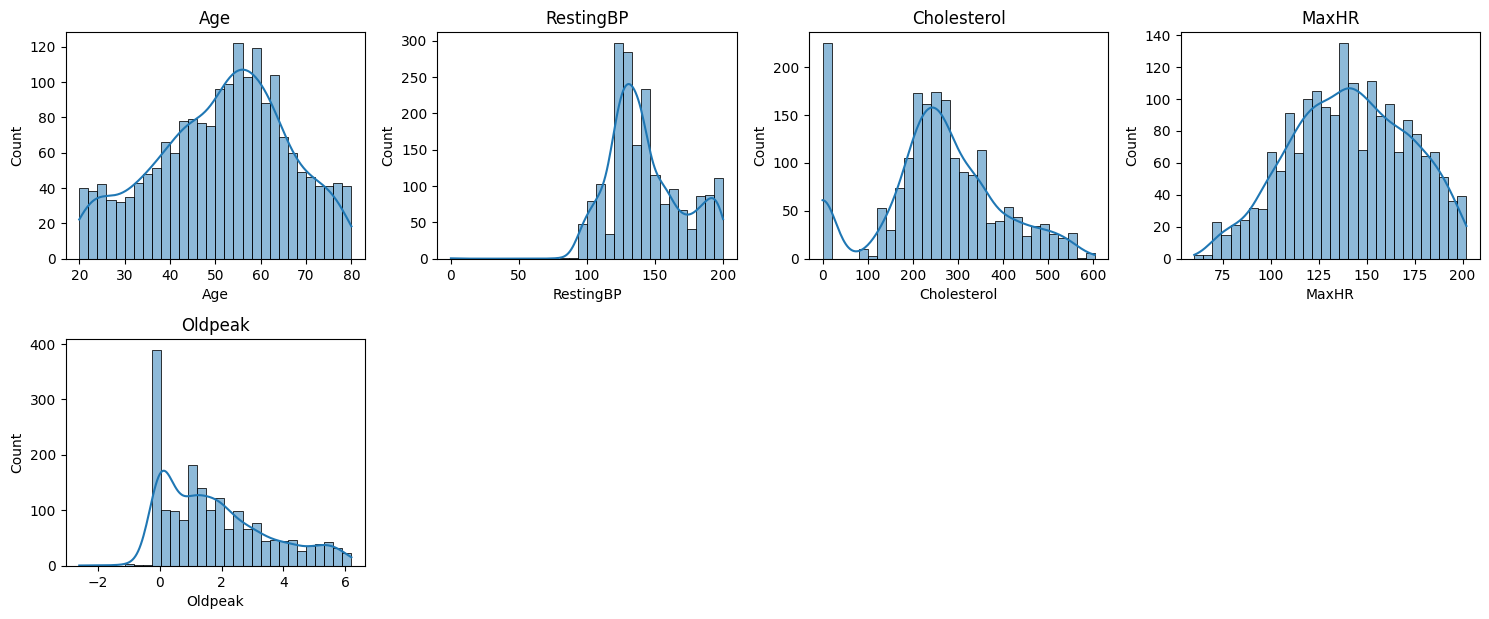

In [369]:
#histogram for the numerical features   (Univariate Analysis)
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,12))
for i ,col in enumerate(X[num_cols].columns):
    plt.subplot(4,4,i+1)
    sns.histplot(X[col],bins=30,kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

## Insights 
**Age**
- The age distribution is roughly normal, centered around 50–60 years.
- Most of the population falls between 40 and 70 years, indicating middle-aged to older adults dominate the dataset.

**RestingBP (Resting Blood Pressure)**
- This aligns with medical reality — heart disease risk rises after age 40.
- RestingBP (Resting Blood Pressure)
- The majority of people have RestingBP between 120 and 150 mm Hg, peaking near 130–140.
- The distribution is slightly right-skewed, suggesting a few individuals with elevated BP (>170).
 
**Cholestrol** 
- Most individuals have cholesterol between 200 and 350 mg/dL, which is above the desirable limit (200).
- There’s a small secondary spike near 0–50.
- The overall shape is right-skewed — a few people have very high cholesterol levels.
- This feature could be clinically important for heart-disease prediction.

**MaxHR(Maximum Heart Rate Achieved)**
- The distribution is approximately normal, centered around 130–150 bpm.
- Very few individuals have a MaxHR < 90 or > 190.
- Indicates most patients achieved a moderately high heart rate.
  
**Oldpeak (ST Depression Induced by Exercise)**
- The distribution is right-skewed, with a sharp peak at 0 (no ST depression).
- Most individuals have Oldpeak between 0 and 2, but a few reach > 5.
- High Oldpeak values often correlate with higher heart-disease risk.
- The presence of many zeros shows many patients experienced no exercise-induced depression.

C:\Users\himan\AppData\Local\Temp\ipykernel_20592\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_20592\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_20592\2724826435.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data,x=col,ax=axes[i],order=data[col]

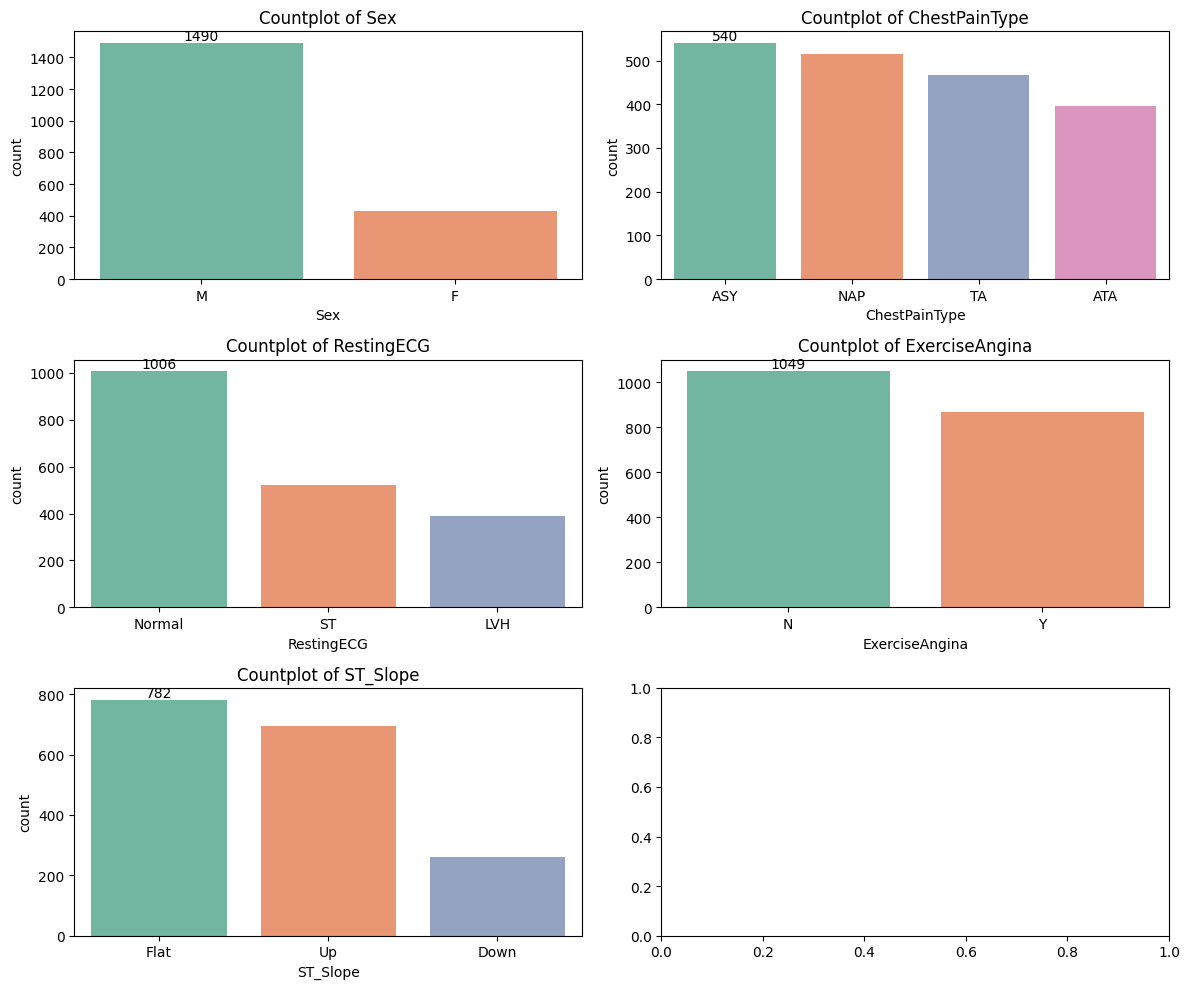

In [370]:
# Countplot for the categorical features (Univariate Analysis) 
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
import seaborn as sns
fig , axes = plt.subplots(3,2,figsize=(12,10))
axes = axes.flatten() 
for i , col in enumerate(cat_cols):
    sns.countplot(data=data,x=col,ax=axes[i],order=data[col].value_counts().index,palette='Set2')
    axes[i].set_title(f'Countplot of {col}')
    axes[i].bar_label(axes[i].containers[0])
plt.tight_layout()
plt.show()

C:\Users\himan\AppData\Local\Temp\ipykernel_20592\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_20592\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_20592\3381151887.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
C:\Users\himan\AppData\Local\Temp\ipykernel_20592

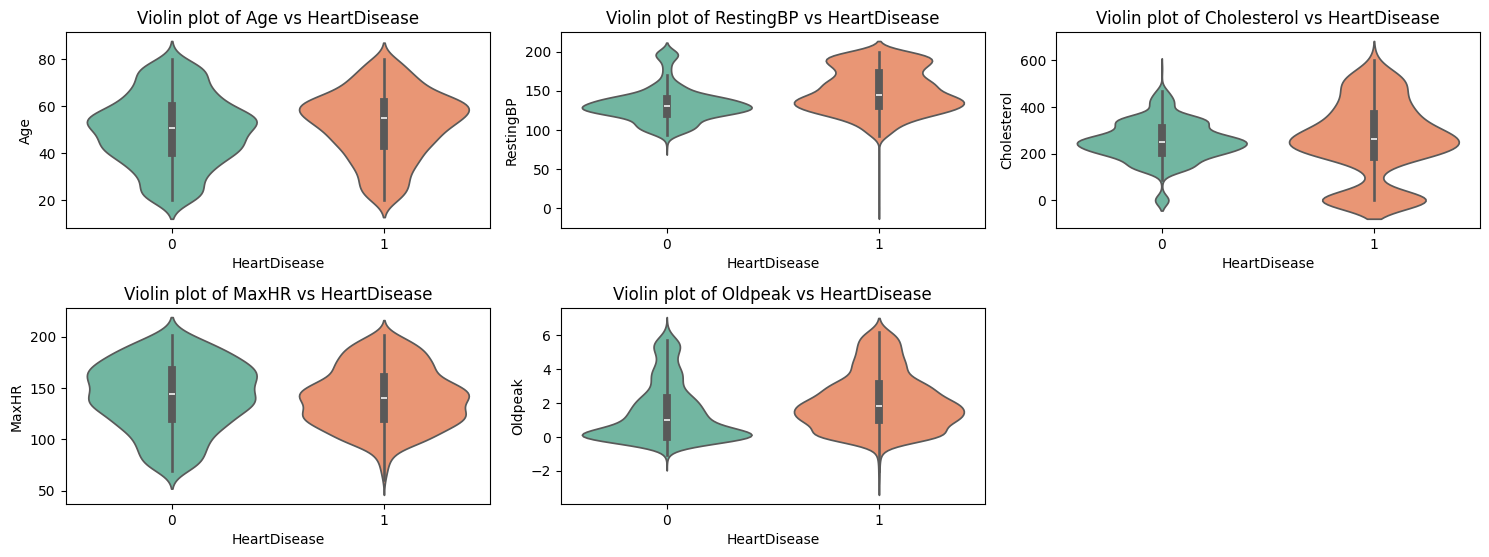

In [371]:
#Bivariate anaylisis for numerical columns
num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']
plt.figure(figsize=(15,8))
for i , col in enumerate(num_cols,1):
    plt.subplot(3,3,i)
    sns.violinplot(x='HeartDisease', y=col,data=data,palette='Set2')
    plt.title(f'Violin plot of {col} vs HeartDisease')

plt.tight_layout()
plt.show()

In [372]:

# sns.pairplot(data[num_cols + ['HeartDisease']] , hue ='HeartDisease' ,palette='Set1',diag_kind='kde')
# plt.show()

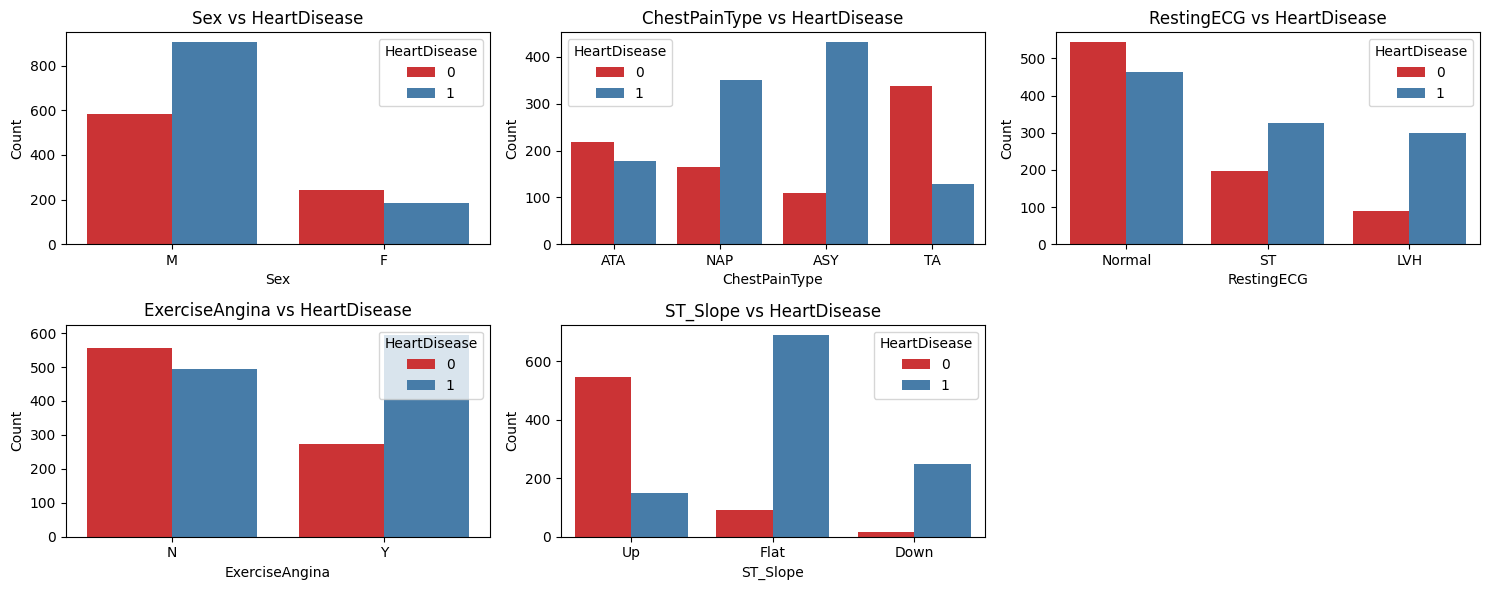

In [374]:
plt.figure(figsize=(15,6))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)   # 2 rows, 3 columns
    sns.countplot(data=X, x=col, hue=y, palette='Set1')
    plt.title(f'{col} vs HeartDisease')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Multivariate Analysis

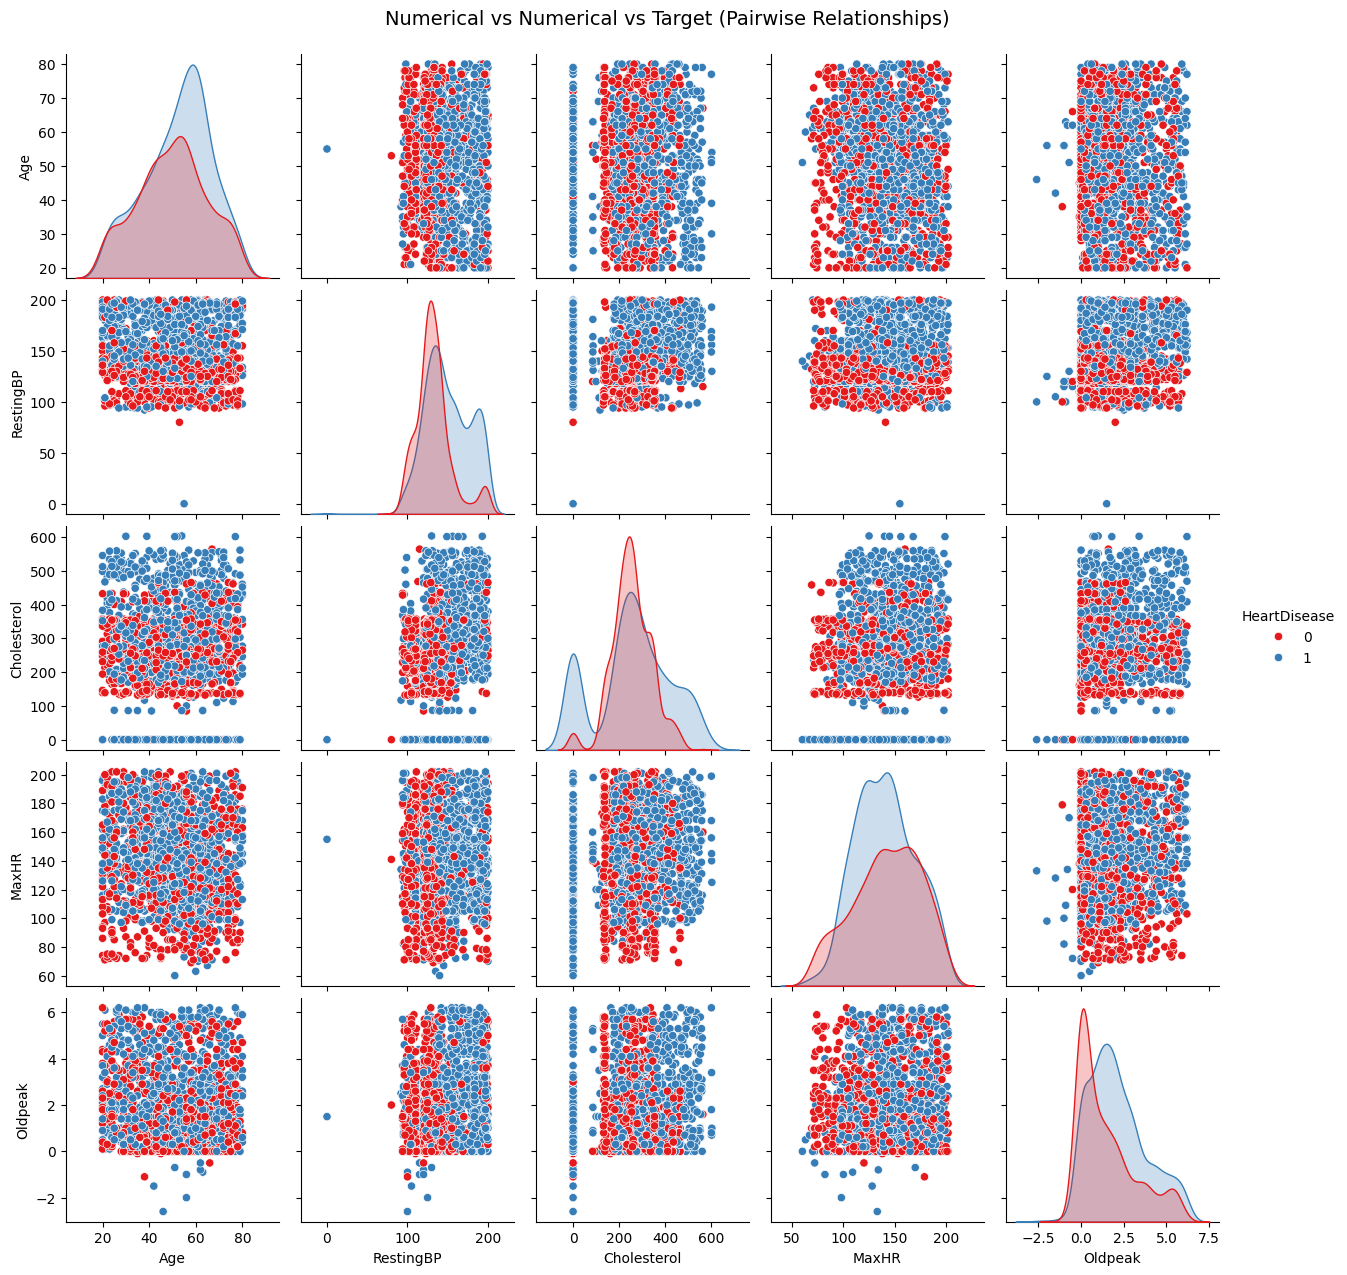

In [375]:
# Numerical + Numerical + Target
df_viz = X.copy()
df_viz = df_viz.drop('FastingBS',axis=1)
df_viz['HeartDisease'] = y 

num_cols = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

sns.pairplot(data=df_viz,hue='HeartDisease',diag_kind='kde',palette='Set1')
plt.suptitle("Numerical vs Numerical vs Target (Pairwise Relationships)",y=1.02,fontsize=14)
plt.show()

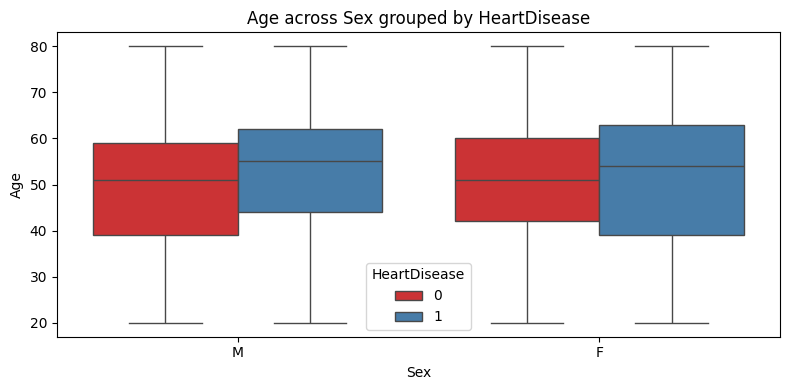

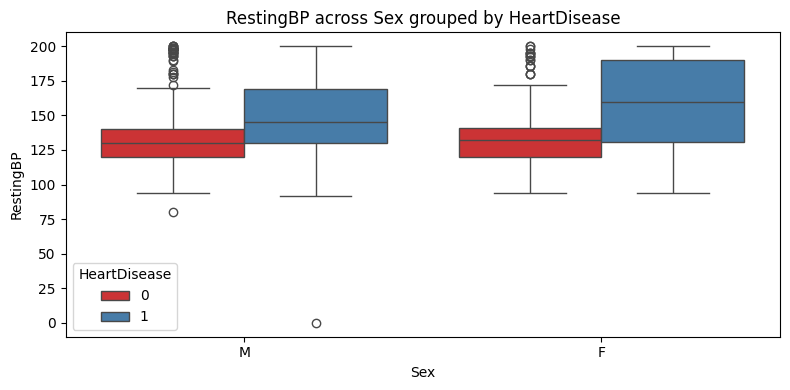

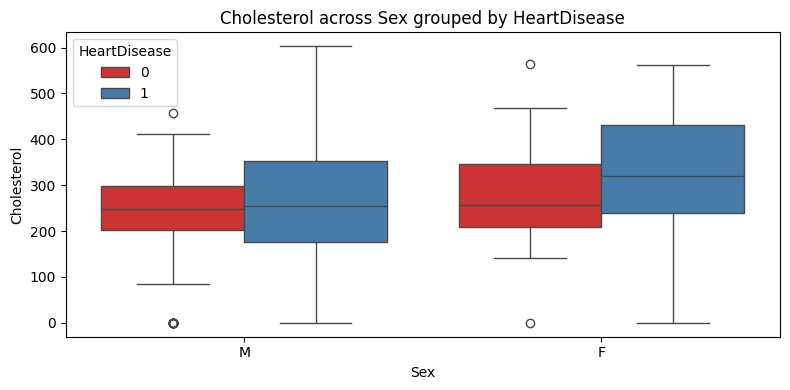

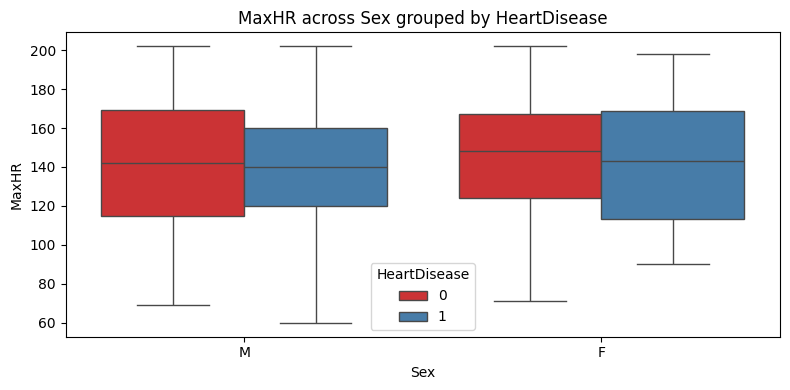

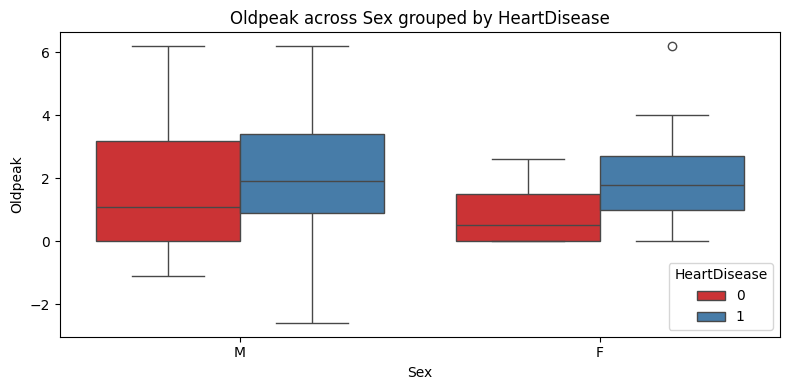

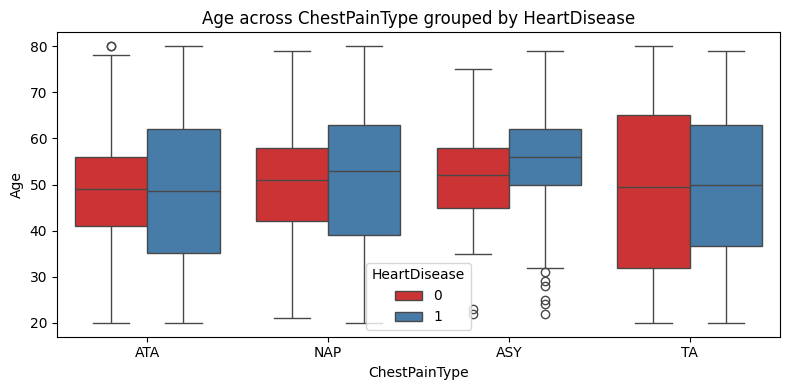

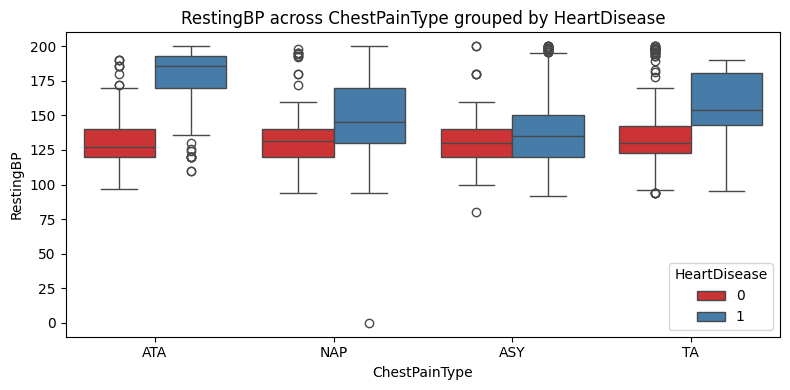

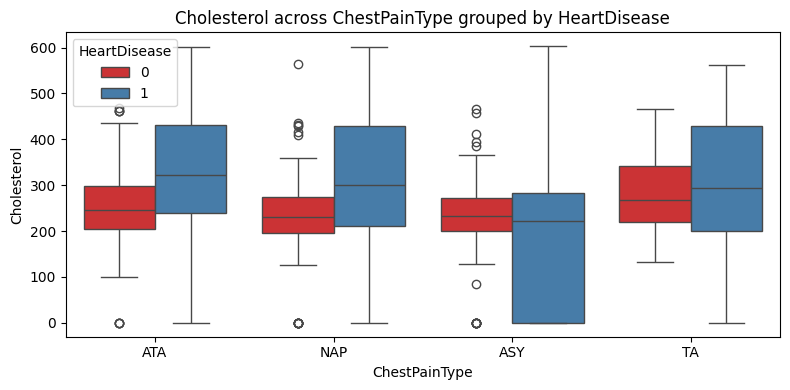

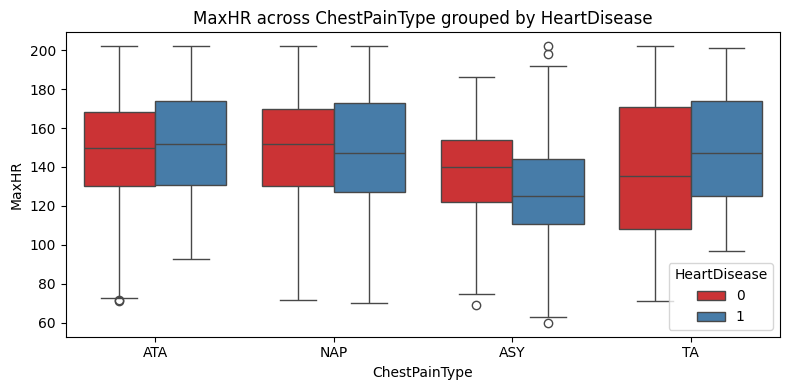

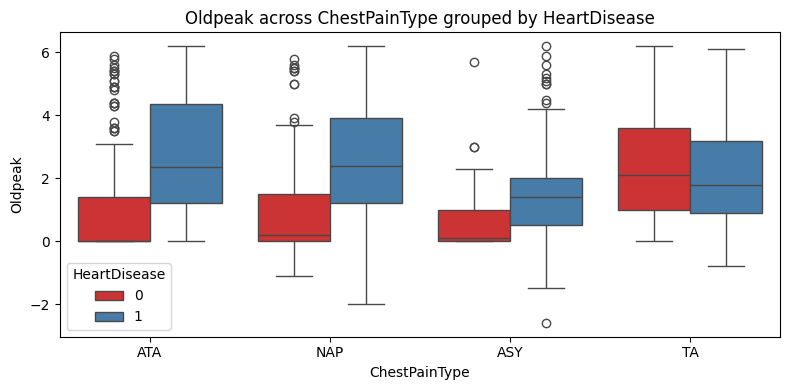

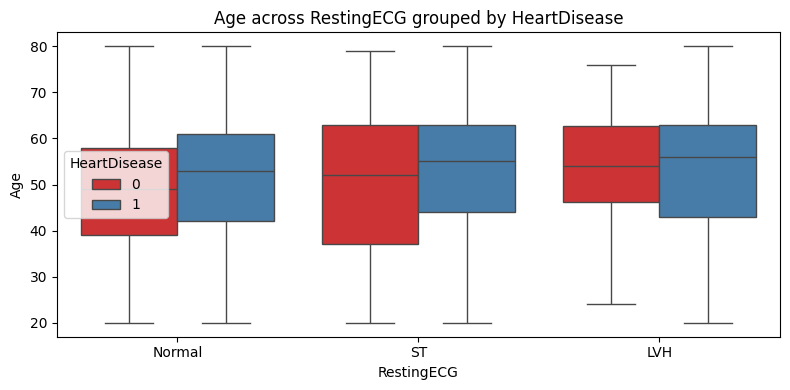

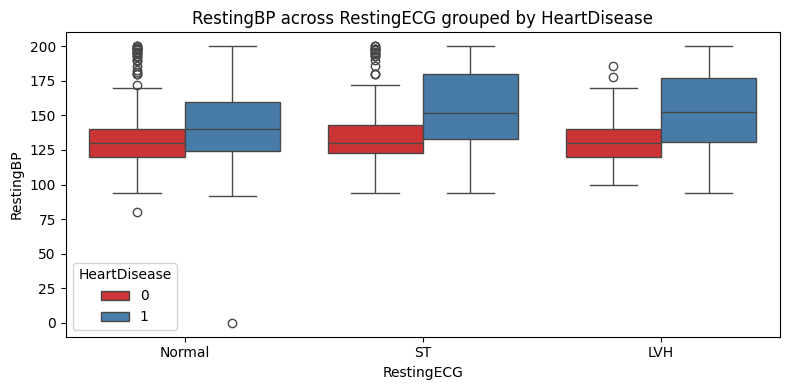

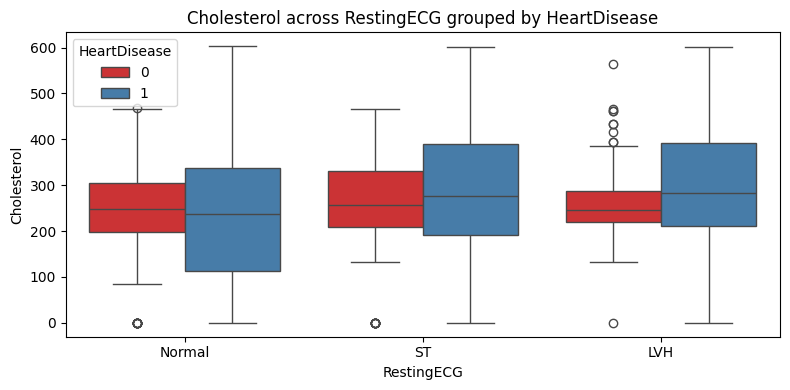

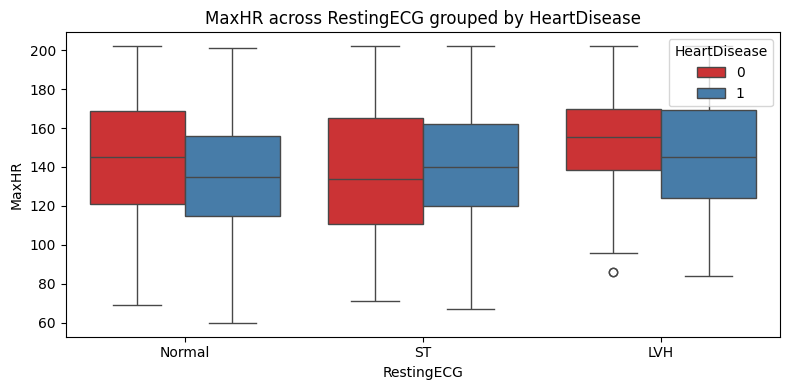

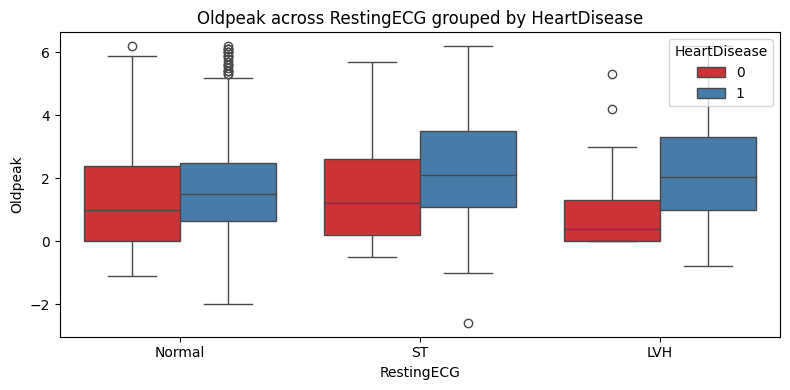

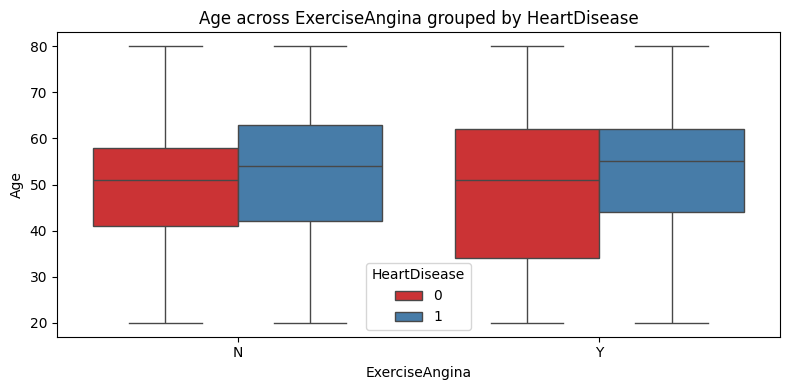

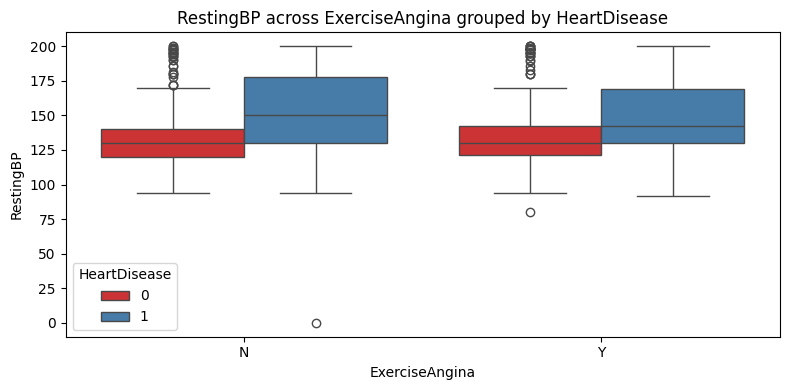

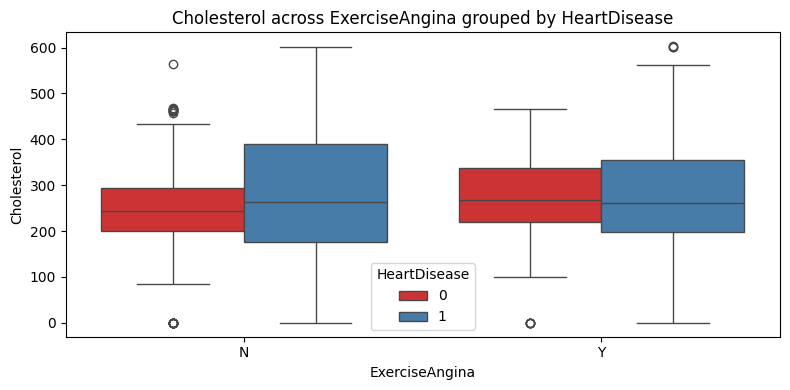

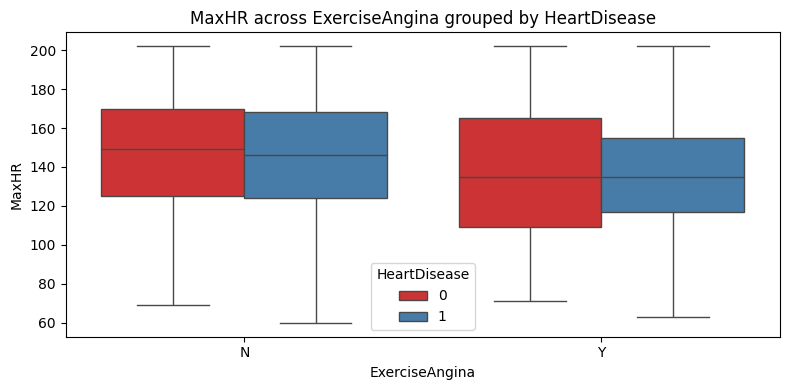

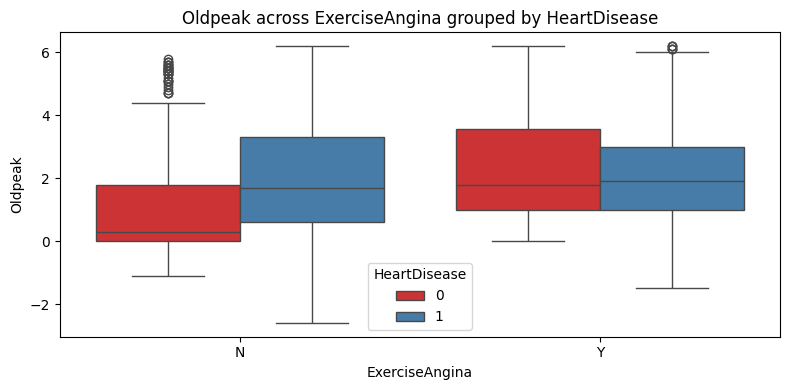

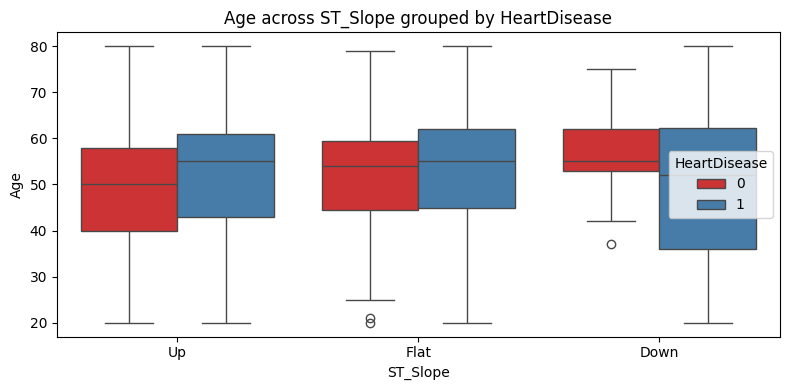

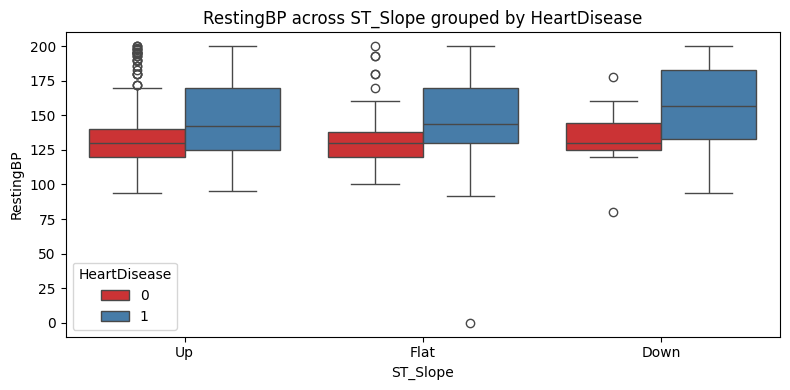

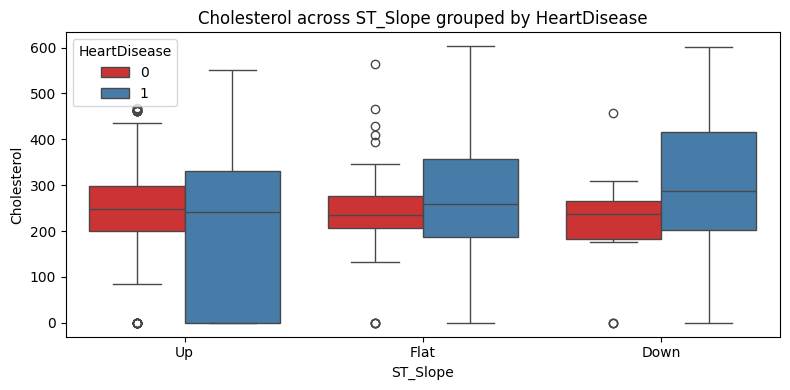

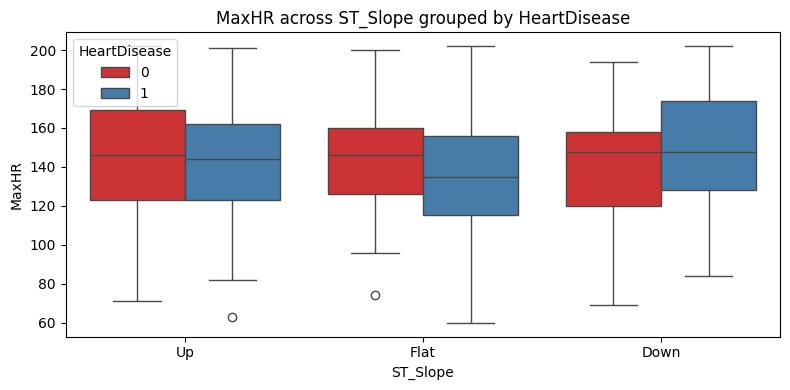

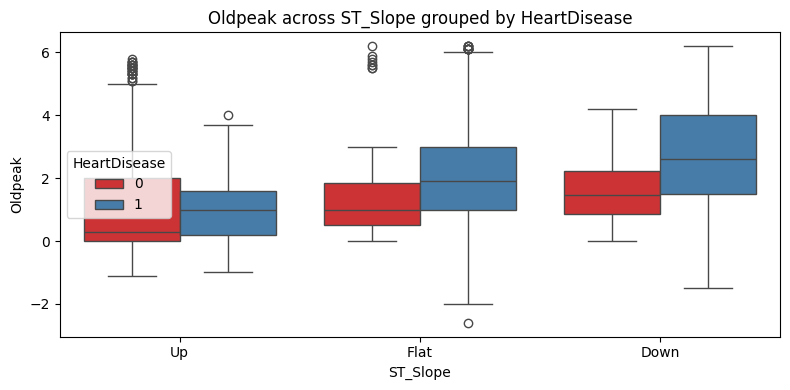

In [376]:
# Numerical + categorical + Target 
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for cat in cat_cols :
    for num in num_cols :
        plt.figure(figsize=(8,4))
        sns.boxplot(data=df_viz,x=cat,y= num , hue= 'HeartDisease' ,palette='Set1')
        plt.title(f'{num} across {cat} grouped by HeartDisease')
        plt.tight_layout()
        plt.show()

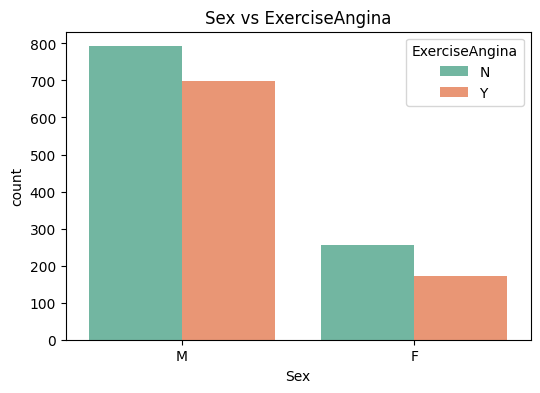

HeartDisease           0     1
Sex ExerciseAngina            
F   N               0.68  0.32
    Y               0.40  0.60
M   N               0.48  0.52
    Y               0.29  0.71

In [377]:
# cat + cat  + target
# Sex vs ExerciseAngina vs HeartDisease
plt.figure(figsize=(6,4))
sns.countplot(data=df_viz, x='Sex', hue='ExerciseAngina', palette='Set2')
plt.title('Sex vs ExerciseAngina')
plt.show()

# With target insight
pd.crosstab([df_viz['Sex'], df_viz['ExerciseAngina']], df_viz['HeartDisease'], normalize='index').round(2)


In [378]:
print("\n===============================================================================\n")
print("CORRELATION ANALYSIS")
print('==================================================================================')

df = X.copy()
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Encoding categorical variables for correlation 
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.
    

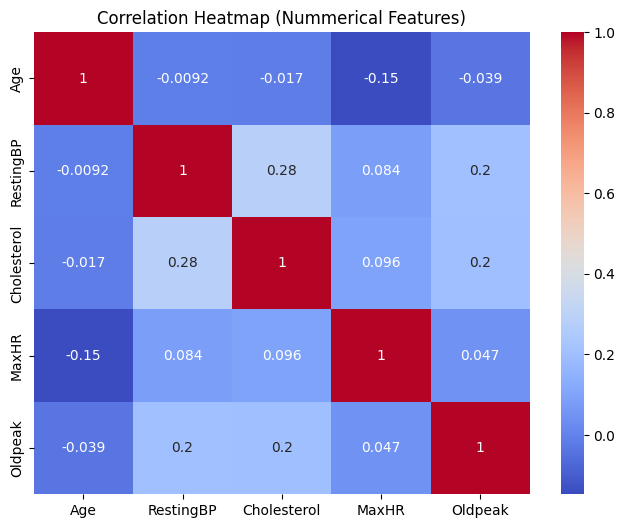

In [432]:
# Plot the heatmap for numeric features

num_cols =  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(8,6))
sns.heatmap(X[num_cols].corr(),annot=True,cmap='coolwarm')
plt.title("Correlation Heatmap (Nummerical Features)")
plt.show()

In [379]:
# data['ST_Slope'].value_counts()

# DATA PREPROCESSING FOR MACHINE LEARNING

In [380]:
# One - Hot Encoding for Ordinal Features

print("\nEncoding Binary Variables Using Label Encoder\n")
binary_cols = ['Sex' ,'ExerciseAngina']
label_encoder = LabelEncoder()
for col in binary_cols :
    X[col] = label_encoder.fit_transform(X[col])
    print(f"Encoding {col} variable ....")

print("\nEncoding Ordinal Variables Using OneHotEnooder\n ")
multi_cols = ['ChestPainType','RestingECG','ST_Slope']

# Onehot Encoder 
# Initialize OneHotEncoder
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Fit and transform only the multi-class categorical columns
encoded_array = onehot_encoder.fit_transform(X[multi_cols])

# Converting encoded data to DataFrame
encoded_df = pd.DataFrame(encoded_array,
                          columns=onehot_encoder.get_feature_names_out(multi_cols),
                          index=X.index)

# Drop the original categorical columns and add the new one-hot encoded ones
X = pd.concat([X.drop(columns=multi_cols), encoded_df], axis=1)
for col in multi_cols:
    print(f'Encoding {col} variable ....')
# Check the encoded dataset
print("\nAFTER PERFORMING ENCODING DATASET TYPE", X.shape)
print('\n')
X.head()



Encoding Binary Variables Using Label Encoder

Encoding Sex variable ....
Encoding ExerciseAngina variable ....

Encoding Ordinal Variables Using OneHotEnooder
 
Encoding ChestPainType variable ....
Encoding RestingECG variable ....
Encoding ST_Slope variable ....

AFTER PERFORMING ENCODING DATASET TYPE (1918, 16)




,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ST_Slope_nan
0,40,1,140,289,0,172,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,49,0,160,180,0,156,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,37,1,130,283,0,98,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,48,0,138,214,0,108,1,1.5,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,54,1,150,195,0,122,0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [381]:
print("\n=================================================================================")
print("\nSCALING FEATURES BY STANDARD SCALER")
print("\n=================================================================================")
from sklearn.preprocessing import StandardScaler

num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

print("\nFeatures scaled using StandardScaler\n")
X.head()



SCALING FEATURES BY STANDARD SCALER


Features scaled using StandardScaler



,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ST_Slope_Flat,ST_Slope_Up,ST_Slope_nan
0,-0.772675,1,-0.092305,0.234401,0,1.001710,0,-1.075985,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.156463,0,0.650474,-0.577507,0,0.479162,0,-0.490078,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,-0.978079,1,-0.463695,0.189709,0,-1.415077,0,-1.075985,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.224931,0,-0.166583,-0.324251,0,-1.088484,1,-0.197125,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.185877,1,0.279084,-0.465777,0,-0.631254,0,-1.075985,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [382]:
X.shape

(1918, 16)

In [383]:
print("\n=================================================================================")
print("\nSPLITTING DATA INTO TRAIN AND TESTS SETS")
print("\n=================================================================================")
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y , test_size=0.2 , random_state = 42 ,stratify=y )
print(f"\nFeature matrix shape: {X.shape}")
print(f"\nTarget vector shape: {y.shape}")



SPLITTING DATA INTO TRAIN AND TESTS SETS


Feature matrix shape: (1918, 16)

Target vector shape: (1918,)


# Statistical Modeling & Machine Learning¶

## Models to Train: 

- **LOGISTIC REGRESSION**-Baseline Linear Model
- **K-NEAREST NEIGHBORS(KNN)**-Instance-based learning
- **NAIVE BAYES**-Probabilistic classifier
- **SUPPORT VECTOR MACHINE(SVM)**-Kernel-based classifier
- **DECISION TREE**-
- **RANDOM FOREST**-
- **EXTRATREES CLASSIFIER**-
- **XGBOOST**-
- **GRADIENT BOOSTING**-
- **ADABOOST**-

In [443]:
print('\n===============================================================================\n')
print('KNeighborsClassifier (KNN)')
print('\n================================================================================\n')

knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train , y_train)

#Prediction
y_pred = knn_classifier.predict(X_test)

print('Accuracy Score :',accuracy_score(y_test,y_pred))
print('\nPrecision Score :',precision_score(y_test,y_pred))
print("\nRecall score :",recall_score(y_test,y_pred))
print('\nF1_score :',f1_score(y_test,y_pred))
print('\nroc_auc_score :',roc_auc_score(y_test,y_pred))
print('\nconfusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('\nclassification_report :\n',classification_report(y_test,y_pred))



KNeighborsClassifier (KNN)


Accuracy Score : 0.9114583333333334

Precision Score : 0.9259259259259259

Recall score : 0.9174311926605505

F1_score : 0.9216589861751152

roc_auc_score : 0.9105228252459379

confusion_matrix :
 [[150  16]
 [ 18 200]]

classification_report :
               precision    recall  f1-score   support

           0       0.89      0.90      0.90       166
           1       0.93      0.92      0.92       218

    accuracy                           0.91       384
   macro avg       0.91      0.91      0.91       384
weighted avg       0.91      0.91      0.91       384



In [387]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.8802083333333334
Precision Score : 0.8944954128440367
Recall score : 0.8944954128440367
F1_score : 0.8944954128440367
roc_auc_score : 0.8779705979882835
confusion_matrix :
 [[143  23]
 [ 23 195]]
classification_report :
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       166
           1       0.89      0.89      0.89       218

    accuracy                           0.88       384
   macro avg       0.88      0.88      0.88       384
weighted avg       0.88      0.88      0.88       384



In [388]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print('\n RANDOM FOREST CLASSIFIER \n')
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))


 RANDOM FOREST CLASSIFIER 

Accuracy Score is : 0.9322916666666666
Precision Score : 0.9403669724770642
Recall score : 0.9403669724770642
F1_score : 0.9403669724770642
roc_auc_score : 0.9310268597325081
confusion_matrix :
 [[153  13]
 [ 13 205]]
classification_report :
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       166
           1       0.94      0.94      0.94       218

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384



In [384]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print("\n=================================================================================")
print("\nTRAINING MULTIPLE MACHINE LEARNING MODELS")
print("\n=================================================================================")

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'SVM': SVC(kernel='rbf', random_state=42, probability=True),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1),
    # 'XGBOOST': XGBClassifier(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1, learning_rate=0.1, eval_metric='logloss'),
    # 'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, max_depth=5, random_state=42, learning_rate=0.1),
    # 'Adaboost': AdaBoostClassifier(random_state=42)
}

print("\nTraining in progress...\n")

# Storage for results
results = []
trained_models = {}

for name, model in models.items():
    print(f"{'='*70}")
    print(f"Training: {name}")
    print(f"{'='*70}")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    # Probability predictions (for AUC)
    if hasattr(model, "predict_proba"):
        y_pred_proba_test = model.predict_proba(X_test)[:, 1]
    else:
        # For models like SVM without predict_proba=False
        try:
            y_pred_proba_test = model.decision_function(X_test)
        except:
            y_pred_proba_test = np.zeros_like(y_pred_test)
    
    # Metrics - Training
    train_acc = accuracy_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    
    # Metrics - Test
    test_acc = accuracy_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_proba_test)
    
    # Store results
    results.append({
        'Model': name,
        'Train_Accuracy': train_acc,
        'Test_Accuracy': test_acc,
        'Test_Precision': test_precision,
        'Test_Recall': test_recall,
        'Test_F1': test_f1,
        'Test_AUC': test_auc,
    })
    
    # Store trained model
    trained_models[name] = {
        'model': model,
        'predictions': y_pred_test,
        'probabilities': y_pred_proba_test
    }
    
    # Print results
    print(f"   Training Performance:")
    print(f"      Accuracy:  {train_acc:.4f}")
    print(f"      Precision: {train_precision:.4f}")
    print(f"      Recall:    {train_recall:.4f}")
    print(f"      F1-Score:  {train_f1:.4f}")
    print(f"\n   Test Performance:")
    print(f"      Accuracy:  {test_acc:.4f}")
    print(f"      Precision: {test_precision:.4f}")
    print(f"      Recall:    {test_recall:.4f}")
    print(f"      F1-Score:  {test_f1:.4f}")
    print(f"      AUC-ROC:   {test_auc:.4f}")
    print(f"\n   Overfitting Gap: {train_acc - test_acc:.4f}")
    
    if train_acc - test_acc < 0.05:
        print(f"Good generalization!")
    elif train_acc - test_acc < 0.15:
        print(f"Moderate overfitting")
    else:
        print(f"High overfitting detected")
    print()

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Sort by F1-score
results_df = results_df.sort_values(by='Test_F1', ascending=False).reset_index(drop=True)

print("\n=================================================================================")
print("MODEL COMPARISON SUMMARY")
print("=================================================================================\n")
# print(results_df)

# Display top performing model
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Performing Model: {best_model_name}")




TRAINING MULTIPLE MACHINE LEARNING MODELS


Training in progress...

Training: Logistic Regression
   Training Performance:
      Accuracy:  0.8892
      Precision: 0.8941
      Recall:    0.9126
      F1-Score:  0.9033

   Test Performance:
      Accuracy:  0.8828
      Precision: 0.9061
      Recall:    0.8853
      F1-Score:  0.8956
      AUC-ROC:   0.9585

   Overfitting Gap: 0.0064
Good generalization!

Training: SVM
   Training Performance:
      Accuracy:  0.9257
      Precision: 0.9163
      Recall:    0.9563
      F1-Score:  0.9359

   Test Performance:
      Accuracy:  0.9323
      Precision: 0.9404
      Recall:    0.9404
      F1-Score:  0.9404
      AUC-ROC:   0.9690

   Overfitting Gap: -0.0066
Good generalization!

Training: Decision Tree
   Training Performance:
      Accuracy:  1.0000
      Precision: 1.0000
      Recall:    1.0000
      F1-Score:  1.0000

   Test Performance:
      Accuracy:  0.8802
      Precision: 0.8945
      Recall:    0.8945
      F1-Score:  0.

In [288]:
X.columns

Index(['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_Normal', 'RestingECG_ST',
       'ST_Slope_Flat', 'ST_Slope_Up', 'ST_Slope_nan'],
      dtype='object')

In [289]:
rf.feature_importances_

array([0.0451157 , 0.02252898, 0.10370074, 0.0935515 , 0.02757887,
       0.05672369, 0.02323782, 0.08161098, 0.01455835, 0.01006305,
       0.06473516, 0.02048299, 0.00951425, 0.13846879, 0.18098688,
       0.10714225])

In [290]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, max_depth=5, 
                                                    random_state=42, learning_rate=0.1)
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.9296875
Precision Score : 0.9441860465116279
Recall score : 0.9311926605504587
F1_score : 0.9376443418013857
roc_auc_score : 0.9294517519619763
confusion_matrix :
 [[154  12]
 [ 15 203]]
classification_report :
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       166
           1       0.94      0.93      0.94       218

    accuracy                           0.93       384
   macro avg       0.93      0.93      0.93       384
weighted avg       0.93      0.93      0.93       384



In [291]:
xgb = XGBClassifier(n_estimators=100, max_depth=5, 
                                     random_state=42, n_jobs=-1, 
                                     learning_rate=0.1, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.9401041666666666
Precision Score : 0.9493087557603687
Recall score : 0.944954128440367
F1_score : 0.9471264367816092
roc_auc_score : 0.9393445340997014
confusion_matrix :
 [[155  11]
 [ 12 206]]
classification_report :
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       166
           1       0.95      0.94      0.95       218

    accuracy                           0.94       384
   macro avg       0.94      0.94      0.94       384
weighted avg       0.94      0.94      0.94       384



In [292]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print('Accuracy Score is :',accuracy_score(y_test,y_pred))
print('Precision Score :',precision_score(y_test,y_pred))
print("Recall score :",recall_score(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred))
print('roc_auc_score :',roc_auc_score(y_test,y_pred))
print('confusion_matrix :\n',confusion_matrix(y_test,y_pred))
print('classification_report :\n',classification_report(y_test,y_pred))

Accuracy Score is : 0.9036458333333334
Precision Score : 0.9209302325581395
Recall score : 0.908256880733945
F1_score : 0.9145496535796767
roc_auc_score : 0.9029236210898641
confusion_matrix :
 [[149  17]
 [ 20 198]]
classification_report :
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       166
           1       0.92      0.91      0.91       218

    accuracy                           0.90       384
   macro avg       0.90      0.90      0.90       384
weighted avg       0.90      0.90      0.90       384

